Priceline-only

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
DATA_DIR = "/Users/Kendra.frederick/Code/shopping-grid/output/aws_eda/priceline-eda/20221101/all-day/"

# Priceline only distros

In [3]:
def plot_bar_cum_pct(data_df, top_n, bar_data_col, line_data_col, order_col, x_label, what,
    plot_title, file_name):
    """Example:
    bar_data_col = 'num_searches'
    line_data_col = 'cum_pct_searches'
    order_col = 'days_til_dept'
    x_label = 'advanced purchase (days)'
    top_n = 1000
    what = 'Searches'
    plot_title = 'Distribution of Searches by Advanced Purchase'
    file_name = 'dtd-overlay'
    """
    
    data_df = data_df.sort_values(by=order_col)[:top_n]
    data_bar = data_df[bar_data_col]
    data_line = data_df[line_data_col]
    xs = range(len(data_bar))

    fig, ax = plt.subplots(figsize=(10,5))
    w = 1 if top_n > 150 else 0.8
    ax.bar(xs, data_bar, width=w);
    ax.set_ylabel(f"Num {what}")
    ax.set_xlabel(x_label)

    ax2 = ax.twinx()
    ax2.plot(xs, data_line, marker=".", color="red")
    ax2.set_ylim(0, 1)
    ax2.set_ylabel(f"Cumulative % Total {what}")

    fig.suptitle(plot_title)
    plt.savefig(f"{file_name}.png")

## Priceline-only

In [4]:
pl_path = os.path.join(DATA_DIR, 'priceline-only-data')

In [5]:
os.listdir(pl_path)

['los-stats',
 'dtd-stats',
 'los-stats_$folder$',
 'dtd-stats_$folder$',
 'market-stats',
 'market-stats_$folder$']

### markets

In [6]:
m_path = os.path.join(pl_path, 'market-stats')
data_list = []
for file in os.listdir(m_path):
    if file != '_SUCCESS':
        try:
            df_temp = pd.read_csv(os.path.join(m_path, file), header=0)
            data_list.append(df_temp)
        except:
            print(f"Trouble parsing {file}")

In [7]:
if len(data_list) > 1:
    df_m = pd.concat(data_list, axis=0)
else:
    df_m = data_list[0].copy()

In [8]:
df_m.head()

,market,num_searches,num_solutions,search_rank,solution_rank,pct_searches,pct_solutions,cum_pct_searches,cum_pct_solutions
0,LAX-CUN,26116,11542999,4,1,0.002657,0.005415,0.014031,0.005415
1,IAH-CUN,27595,10465070,3,2,0.002808,0.004910,0.011373,0.010325
2,LAX-HNL,16100,10054591,12,3,0.001638,0.004717,0.029656,0.015042
3,PHL-CUN,23353,8872252,5,4,0.002376,0.004162,0.016407,0.019204
4,DFW-LAS,16102,7264776,11,5,0.001638,0.003408,0.028018,0.022613


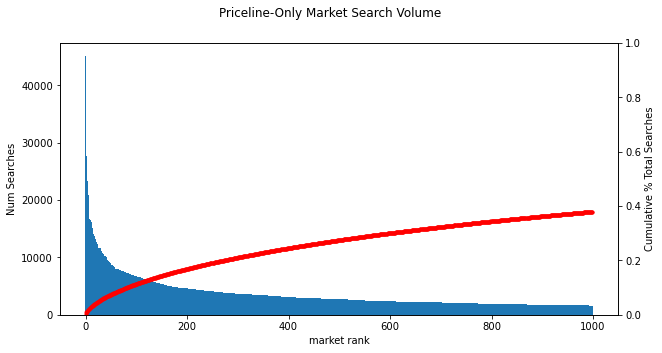

In [17]:
plot_bar_cum_pct(df_m, 1000, 'num_searches', 'cum_pct_searches', 'search_rank', 'market rank', 'Searches', 
                 'Priceline-Only Market Search Volume', 'plo-mrkt-srch')

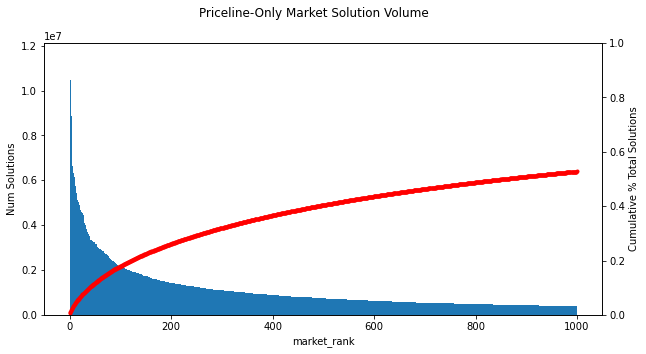

In [49]:
plot_bar_cum_pct(df_m, 1000, 'num_solutions', 'cum_pct_solutions', 'solution_rank', 'market_rank', 'Solutions', 
                 'Priceline-Only Market Solution Volume', 'plo-mrkt-sltns')

In [11]:
def print_market_stats(df, num_pct, what):
    what_dict = {'search':
                 {'rank_col': 'search_rank',
                  'cum_pct_col': 'cum_pct_searches'},
                 'solution':
                 {'rank_col': 'solution_rank',
                  'cum_pct_col': 'cum_pct_solutions'},
                }
    abs_num = int(len(df) * num_pct)
    print(f"For the top {num_pct*100}% of markets:")
    print(f"Number of markets: {abs_num:,}")
    x = df[df[what_dict[what]['rank_col']] == abs_num]
    cum_pct = x[what_dict[what]['cum_pct_col']].values[0]
    print(f"Cumulative % search volume: {cum_pct*100:.0f}%")

In [12]:
len(df_m)

174649

In [13]:
print_market_stats(df_m, 0.01, 'search')

For the top 1.0% of markets:
Number of markets: 1,746
Cumulative % search volume: 48%


In [14]:
print_market_stats(df_m, 0.05, 'search')

For the top 5.0% of markets:
Number of markets: 8,732
Cumulative % search volume: 75%


In [15]:
print_market_stats(df_m, 0.1, 'search')

For the top 10.0% of markets:
Number of markets: 17,464
Cumulative % search volume: 85%


In [16]:
print_market_stats(df_m, 0.25, 'search')

For the top 25.0% of markets:
Number of markets: 43,662
Cumulative % search volume: 94%


In [19]:
print_market_stats(df_m, 0.01, 'solution')

For the top 1.0% of markets:
Number of markets: 1,746
Cumulative % search volume: 63%


In [20]:
print_market_stats(df_m, 0.05, 'solution')

For the top 5.0% of markets:
Number of markets: 8,732
Cumulative % search volume: 87%


In [21]:
print_market_stats(df_m, 0.1, 'solution')

For the top 10.0% of markets:
Number of markets: 17,464
Cumulative % search volume: 93%


In [22]:
print_market_stats(df_m, 0.25, 'solution')

For the top 25.0% of markets:
Number of markets: 43,662
Cumulative % search volume: 98%


### dtd

In [5]:
# modify me
data_path = os.path.join(pl_path, 'dtd-stats')

data_list = []
for file in os.listdir(data_path):
    if file != '_SUCCESS':
        try:
            df_temp = pd.read_csv(os.path.join(data_path, file), header=0)
            data_list.append(df_temp)
        except:
            print(f"Trouble parsing {file}")

if len(data_list) > 1:
    # change var name here
    df_dtd = pd.concat(data_list, axis=0)
else:
    # change var name here
    df_dtd = data_list[0].copy()

In [6]:
df_dtd.head()

,days_til_dept,num_searches,num_solutions,pct_searches,pct_solutions,cum_pct_searches,cum_pct_solutions
0,-11,1885,331447,0.000236,0.000155,0.000236,0.000155
1,-10,868,100287,0.000109,0.000047,0.000344,0.000203
2,-9,786,59056,0.000098,0.000028,0.000442,0.000230
3,-7,1733,740351,0.000217,0.000347,0.000659,0.000578
4,-5,315,402109,0.000039,0.000189,0.000698,0.000766


In [7]:
df_dtd_clip = df_dtd[df_dtd['days_til_dept'] >= 0]

In [8]:
len(df_dtd), len(df_dtd_clip)

(369, 362)

In [9]:
# re-compute cum_pct_searches

df_dtd_clip.loc[:, 'pct_searches'] = df_dtd_clip['num_searches'] / df_dtd_clip['num_searches'].sum()
df_dtd_clip.loc[:, 'cum_pct_searches'] = df_dtd_clip['pct_searches'].cumsum()

/var/folders/2c/ll166b4x7zlbnj4_twhr_69c0000gq/T/ipykernel_16997/763544540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dtd_clip.loc[:, 'pct_searches'] = df_dtd_clip['num_searches'] / df_dtd_clip['num_searches'].sum()
/var/folders/2c/ll166b4x7zlbnj4_twhr_69c0000gq/T/ipykernel_16997/763544540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dtd_clip.loc[:, 'cum_pct_searches'] = df_dtd_clip['pct_searches'].cumsum()


In [10]:
df_dtd_clip.head()

,days_til_dept,num_searches,num_solutions,pct_searches,pct_solutions,cum_pct_searches,cum_pct_solutions
7,0,115977,18376250,0.014518,0.008621,0.014518,0.009564
8,1,169523,46837002,0.021220,0.021973,0.035738,0.031537
9,2,157706,43758796,0.019741,0.020529,0.055479,0.052066
10,3,217494,64457178,0.027225,0.030240,0.082705,0.082306
11,4,118614,31607571,0.014848,0.014829,0.097553,0.097134


In [11]:
df_dtd_clip.tail()

,days_til_dept,num_searches,num_solutions,pct_searches,pct_solutions,cum_pct_searches,cum_pct_solutions
364,357,39,2706,0.000005,1.269505e-06,0.999985,0.999998
365,358,34,1154,0.000004,5.413927e-07,0.999989,0.999999
366,359,27,958,0.000003,4.494404e-07,0.999993,0.999999
367,360,48,1246,0.000006,5.845540e-07,0.999999,1.000000
368,361,9,129,0.000001,6.051964e-08,1.000000,1.000000


In [12]:
df_dtd_clip.sort_values(by='num_searches', ascending=False).head()

,days_til_dept,num_searches,num_solutions,pct_searches,pct_solutions,cum_pct_searches,cum_pct_solutions
37,30,429629,80297318,0.053780,0.037671,0.461233,0.434025
10,3,217494,64457178,0.027225,0.030240,0.082705,0.082306
8,1,169523,46837002,0.021220,0.021973,0.035738,0.031537
17,10,160420,47777101,0.020081,0.022414,0.193389,0.192822
9,2,157706,43758796,0.019741,0.020529,0.055479,0.052066


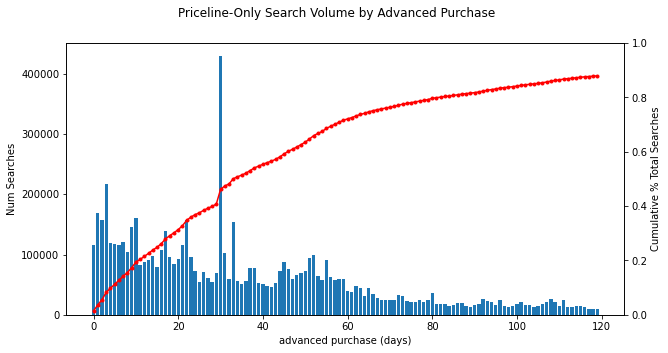

In [32]:
plot_bar_cum_pct(df_dtd_clip, 
                 top_n=120, 
                 bar_data_col='num_searches', 
                 line_data_col='cum_pct_searches', 
                 order_col='days_til_dept', 
                 x_label='advanced purchase (days)', 
                 what='Searches', 
                 plot_title='Priceline-Only Search Volume by Advanced Purchase', 
                 file_name='plo-dtd-srchs')

In [38]:
def print_time_stats(df, time_col, num, data_col='cum_pct_searches', individual_val_col='pct_searches'):
    x = df[df[time_col] == num]
    cum_pct = x[data_col].values[0]
    print(f"At {num} {time_col}:")
    print(f"Cumulative % search volume: {cum_pct*100:.0f}%")
    if individual_val_col is not None:
        pct = x[individual_val_col].values[0]
        print(f"% search volume: {pct*100:.1f}%")
    print()

In [40]:
for num in [14, 30, 60, 90, 120]:
    print_time_stats(df=df_dtd_clip,
                     time_col='days_til_dept',
                     num=num,
#                      individual_val_col=None
                    )

At 14 days_til_dept:
Cumulative % search volume: 24%
% search volume: 1.2%

At 30 days_til_dept:
Cumulative % search volume: 46%
% search volume: 5.4%

At 60 days_til_dept:
Cumulative % search volume: 72%
% search volume: 0.5%

At 90 days_til_dept:
Cumulative % search volume: 82%
% search volume: 0.2%

At 120 days_til_dept:
Cumulative % search volume: 88%
% search volume: 0.2%



### los

In [13]:
# modify me
data_path = os.path.join(pl_path, 'los-stats')

data_list = []
for file in os.listdir(data_path):
    if file != '_SUCCESS':
        try:
            df_temp = pd.read_csv(os.path.join(data_path, file), header=0)
            data_list.append(df_temp)
        except:
            print(f"Trouble parsing {file}")

if len(data_list) > 1:
    # change var name here
    df_los = pd.concat(data_list, axis=0)
else:
    # change var name here
    df_los = data_list[0].copy()

In [14]:
df_los.head()

,stay_duration,num_searches,num_solutions,pct_searches,pct_solutions,cum_pct_searches,cum_pct_solutions
0,NaN,3913435,259326308,0.486706,0.121662,0.486706,0.121662
1,0.0,103572,8215348,0.012881,0.003854,0.499587,0.125516
2,1.0,121549,59645351,0.015117,0.027982,0.514704,0.153498
3,2.0,373261,180049856,0.046422,0.084469,0.561126,0.237967
4,3.0,759142,328445552,0.094413,0.154088,0.655539,0.392056


In [15]:
df_rt_los = df_los.dropna()

# re-compute cum_pct_searches

df_rt_los.loc[:, 'pct_searches'] = df_rt_los['num_searches'] / df_rt_los['num_searches'].sum()
df_rt_los.loc[:, 'cum_pct_searches'] = df_rt_los['pct_searches'].cumsum()

/var/folders/2c/ll166b4x7zlbnj4_twhr_69c0000gq/T/ipykernel_16997/2598868277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt_los.loc[:, 'pct_searches'] = df_rt_los['num_searches'] / df_rt_los['num_searches'].sum()
/var/folders/2c/ll166b4x7zlbnj4_twhr_69c0000gq/T/ipykernel_16997/2598868277.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt_los.loc[:, 'cum_pct_searches'] = df_rt_los['pct_searches'].cumsum()


In [16]:
df_rt_los.head()

,stay_duration,num_searches,num_solutions,pct_searches,pct_solutions,cum_pct_searches,cum_pct_solutions
1,0.0,103572,8215348,0.025095,0.003854,0.025095,0.125516
2,1.0,121549,59645351,0.029451,0.027982,0.054546,0.153498
3,2.0,373261,180049856,0.090439,0.084469,0.144985,0.237967
4,3.0,759142,328445552,0.183936,0.154088,0.328920,0.392056
5,4.0,515418,260013217,0.124883,0.121984,0.453803,0.514040


In [17]:
df_rt_los.sort_values(by='num_searches', ascending=False).head()

,stay_duration,num_searches,num_solutions,pct_searches,pct_solutions,cum_pct_searches,cum_pct_solutions
4,3.0,759142,328445552,0.183936,0.154088,0.328920,0.392056
8,7.0,523588,252793631,0.126862,0.118597,0.729636,0.768821
5,4.0,515418,260013217,0.124883,0.121984,0.453803,0.514040
3,2.0,373261,180049856,0.090439,0.084469,0.144985,0.237967
6,5.0,336808,169101410,0.081607,0.079333,0.535410,0.593373


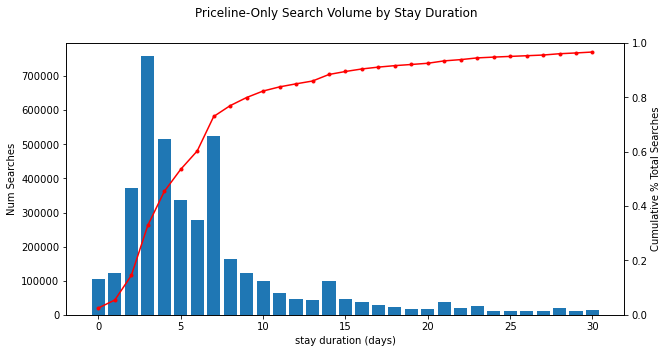

In [50]:
plot_bar_cum_pct(df_rt_los, 
                 top_n=31, 
                 bar_data_col='num_searches', 
                 line_data_col='cum_pct_searches', 
                 order_col='stay_duration', 
                 x_label='stay duration (days)', 
                 what='Searches', 
                 plot_title='Priceline-Only Search Volume by Stay Duration', 
                 file_name='plo-los-srchs')

In [48]:
for num in [3, 7, 14, 21, 30]:
    print_time_stats(df=df_rt_los,
                     time_col='stay_duration',
                     num=num,
#                      individual_val_col=''
                    )

At 3 stay_duration:
Cumulative % search volume: 33%
% search volume: 18.4%

At 7 stay_duration:
Cumulative % search volume: 73%
% search volume: 12.7%

At 14 stay_duration:
Cumulative % search volume: 88%
% search volume: 2.4%

At 21 stay_duration:
Cumulative % search volume: 93%
% search volume: 0.9%

At 30 stay_duration:
Cumulative % search volume: 97%
% search volume: 0.3%

